In [ ]:
# install full version
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 39.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.

In [ ]:
!pip install git+https://github.com/pycaret/pycaret.git@master

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-cbhgs5il
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-cbhgs5il
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 25.7 MB/s eta 0:00:00
  Created wheel for pycaret: filename=pycaret-3.4.0-py3-none-any.whl size=491177 sha256=a0867faba06780aee1f696409bc2e3f0f0d3953283fcf423a02556641290b822
  Stored in directory: /tm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier

import shap

In [ ]:
df = pd.read_csv('Ionic_conductivity_training_dataset.csv')
df

,Formula,Type,Crystal system,Ionic conductivity (S/cm),Reference,Spacegroup,Unnamed: 6,Reference index,Source,composition,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,NaZr2(PO4)3,NASICON,Trigonal,4.500000e-06,"1,2,3",167.0,NaN,1.0,10.1038/s41467-021-26006-3,Na1 Zr2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,NaGe2(PO4)3,NASICON,Trigonal,1.100000e-12,"1,2,3",148.0,NaN,2.0,10.1088/2399-6528/ab92d8,Na1 Ge2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,NaTi2(PO4)3,NASICON,Trigonal,4.430000e-10,"1,2,3",167.0,NaN,3.0,10.1016/j.jpowsour.2014.09.137,Na1 Ti2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,NaHf2(PO4)3,NASICON,Trigonal,8.770000e-10,"1,2,3",167.0,NaN,4.0,10.1016/0167-2738(93)90179-7,Na1 Hf2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,NaSn2(PO4)3,NASICON,Trigonal,4.650000e-09,"1,2,3",148.0,NaN,5.0,10.1016/0025-5408(92)90148-S,Na1 Sn2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Li2MgCl4,Li-halide,Monoclinic,2.400000e-04,123,NaN,NaN,NaN,NaN,Li2 Mg1 Cl4,...,0.575065,0.572069,0.571484,True,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,Li2MgBr4,Li-halide,Monoclinic,1.930000e-04,123,NaN,NaN,NaN,NaN,Li2 Mg1 Br4,...,0.575065,0.572069,0.571484,True,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,Li3AlCl6,Li-halide,Monoclinic,5.300000e-05,123,NaN,NaN,NaN,NaN,Li3 Al1 Cl6,...,0.603719,0.600668,0.600059,True,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,Li6MgCl8,Li-halide,Monoclinic,4.300000e-05,123,NaN,NaN,NaN,NaN,Li6 Mg1 Cl8,...,0.556540,0.542966,0.536263,True,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [ ]:
df['Ionic conductivity (S/cm)'] = (df['Ionic conductivity (S/cm)'] >= 1e-4).astype(int)
df

,Formula,Type,Crystal system,Ionic conductivity (S/cm),Reference,Spacegroup,Unnamed: 6,Reference index,Source,composition,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,NaZr2(PO4)3,NASICON,Trigonal,0,"1,2,3",167.0,NaN,1.0,10.1038/s41467-021-26006-3,Na1 Zr2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,NaGe2(PO4)3,NASICON,Trigonal,0,"1,2,3",148.0,NaN,2.0,10.1088/2399-6528/ab92d8,Na1 Ge2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,NaTi2(PO4)3,NASICON,Trigonal,0,"1,2,3",167.0,NaN,3.0,10.1016/j.jpowsour.2014.09.137,Na1 Ti2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,NaHf2(PO4)3,NASICON,Trigonal,0,"1,2,3",167.0,NaN,4.0,10.1016/0167-2738(93)90179-7,Na1 Hf2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,NaSn2(PO4)3,NASICON,Trigonal,0,"1,2,3",148.0,NaN,5.0,10.1016/0025-5408(92)90148-S,Na1 Sn2 P3 O12,...,0.666814,0.666673,0.666667,True,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Li2MgCl4,Li-halide,Monoclinic,1,123,NaN,NaN,NaN,NaN,Li2 Mg1 Cl4,...,0.575065,0.572069,0.571484,True,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,Li2MgBr4,Li-halide,Monoclinic,1,123,NaN,NaN,NaN,NaN,Li2 Mg1 Br4,...,0.575065,0.572069,0.571484,True,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,Li3AlCl6,Li-halide,Monoclinic,0,123,NaN,NaN,NaN,NaN,Li3 Al1 Cl6,...,0.603719,0.600668,0.600059,True,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,Li6MgCl8,Li-halide,Monoclinic,0,123,NaN,NaN,NaN,NaN,Li6 Mg1 Cl8,...,0.556540,0.542966,0.536263,True,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Columns: 146 entries, Ionic conductivity (S/cm) to frac f valence electrons
dtypes: float64(143), int64(3)
memory usage: 374.3 KB


In [ ]:
# Last 145 coumns are the Matminer compositional attributes
print("There are {} columns of names listed below:\n\n{}".format(df.shape[1], df.columns.values))

There are 155 columns of names listed below:

['Formula' 'Type' 'Crystal system' 'Ionic conductivity (S/cm)' 'Reference'
 'Spacegroup' 'Unnamed: 6' 'Reference index' 'Source' 'composition'
 'MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'


In [ ]:
df['Ionic conductivity (S/cm)'].value_counts()

,count
Ionic conductivity (S/cm),
1,191
0,137


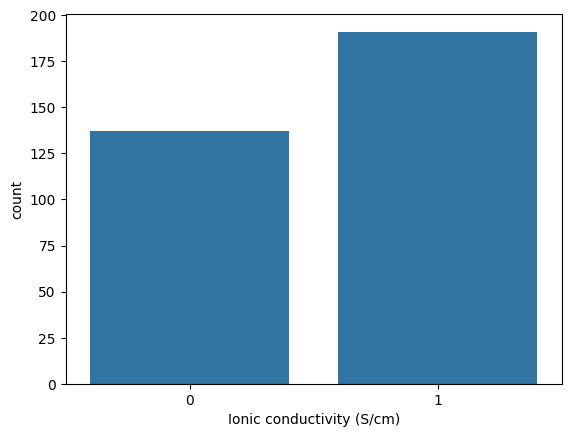

In [ ]:
import seaborn as sb
sb.countplot(x ='Ionic conductivity (S/cm)', data = df)
plt.grid(False)
plt.show()

In [ ]:
len(df)

328

In [ ]:
df['Ionic conductivity (S/cm)'].value_counts() / len(df)

,count
Ionic conductivity (S/cm),
1,0.582317
0,0.417683


In [ ]:
df['compound possible'].value_counts()

,count
compound possible,
1,259
0,69


In [ ]:
df = df.drop(['Formula',
                  'Type',
                  'Crystal system',
                  'Reference',
                  'Spacegroup',
                  'Unnamed: 6',
                  'Reference index',
                  'Source',
                  'composition'], axis = 1)
df

In [ ]:
X = df.drop(['Ionic conductivity (S/cm)'], axis=1)
X

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,8.0,40.0,32.0,12.888889,6.728395,8.0,2.0,87.0,85.0,76.833333,...,0.666814,0.666673,0.666667,1,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,8.0,32.0,24.0,12.000000,5.444444,8.0,2.0,87.0,85.0,80.722222,...,0.666814,0.666673,0.666667,1,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,8.0,22.0,14.0,10.888889,3.851852,8.0,2.0,87.0,85.0,76.722222,...,0.666814,0.666673,0.666667,1,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,8.0,72.0,64.0,16.444444,12.345679,8.0,2.0,87.0,85.0,76.944444,...,0.666814,0.666673,0.666667,1,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,8.0,50.0,42.0,14.000000,8.333333,8.0,2.0,87.0,85.0,80.833333,...,0.666814,0.666673,0.666667,1,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,3.0,17.0,14.0,12.285714,5.387755,17.0,1.0,94.0,93.0,63.714286,...,0.575065,0.572069,0.571484,1,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,3.0,35.0,32.0,22.571429,14.204082,35.0,1.0,95.0,94.0,64.285714,...,0.575065,0.572069,0.571484,1,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,3.0,17.0,14.0,12.400000,5.640000,17.0,1.0,94.0,93.0,64.000000,...,0.603719,0.600668,0.600059,1,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,3.0,17.0,14.0,11.066667,6.453333,17.0,1.0,94.0,93.0,55.066667,...,0.556540,0.542966,0.536263,1,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [ ]:
X.columns

Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       '5-norm', '7-norm', '10-norm', 'compound possible', 'max ionic char',
       'avg ionic char', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons'],
      dtype='object', length=145)

In [ ]:
y = df['Ionic conductivity (S/cm)']
y

,Ionic conductivity (S/cm)
0,0
1,0
2,0
3,0
4,0
...,...
323,1
324,1
325,0
326,0


In [ ]:
df['compound possible'] = (df['compound possible'] == True).astype(int)
df

,Ionic conductivity (S/cm),MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,5-norm,7-norm,10-norm,compound possible,max ionic char,avg ionic char,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,0,8.0,40.0,32.0,12.888889,6.728395,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.121437,0.364583,0.593750,0.041667,0.000000
1,0,8.0,32.0,24.0,12.000000,5.444444,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.099691,0.301724,0.525862,0.172414,0.000000
2,0,8.0,22.0,14.0,10.888889,3.851852,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.114771,0.364583,0.593750,0.041667,0.000000
3,0,8.0,72.0,64.0,16.444444,12.345679,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.122367,0.282258,0.459677,0.032258,0.225806
4,0,8.0,50.0,42.0,14.000000,8.333333,8.0,2.0,87.0,85.0,...,0.666814,0.666673,0.666667,1,0.792998,0.101249,0.301724,0.525862,0.172414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,3.0,17.0,14.0,12.285714,5.387755,17.0,1.0,94.0,93.0,...,0.575065,0.572069,0.571484,1,0.695200,0.161536,0.375000,0.625000,0.000000,0.000000
324,1,3.0,35.0,32.0,22.571429,14.204082,35.0,1.0,95.0,94.0,...,0.575065,0.572069,0.571484,1,0.624726,0.143394,0.166667,0.277778,0.555556,0.000000
325,0,3.0,17.0,14.0,12.400000,5.640000,17.0,1.0,94.0,93.0,...,0.603719,0.600668,0.600059,1,0.695200,0.155062,0.354167,0.645833,0.000000,0.000000
326,0,3.0,17.0,14.0,11.066667,6.453333,17.0,1.0,94.0,93.0,...,0.556540,0.542966,0.536263,1,0.695200,0.169469,0.375000,0.625000,0.000000,0.000000


In [ ]:
df['compound possible'].value_counts()

,count
compound possible,
1,259
0,69


In [ ]:
df1 = pd.read_csv('Ionic_conductivity_validation_dataset.csv')
df1

,material_id,builder_meta,nsites,elements,nelements,composition,composition_reduced,formula_pretty,formula_anonymous,chemsys,...,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,spacegroup_num,crystal_system,crystal_system_int,is_centrosymmetric,n_symmetry_ops,exists
0,mp-841,emmet_version='0.72.20' pymatgen_version='2023...,8,"[Element Li, Element O]",2,Li4 O4,Li2 O2,Li2O2,AB,Li-O,...,0.428571,0.571429,0.000000,0.000000,194,hexagonal,2,True,48,False
1,mp-1138,emmet_version='0.72.20' pymatgen_version='2023...,2,"[Element F, Element Li]",2,Li1 F1,Li1 F1,LiF,AB,F-Li,...,0.375000,0.625000,0.000000,0.000000,225,cubic,1,True,96,False
2,mp-1153,emmet_version='0.72.20' pymatgen_version='2023...,3,"[Element Li, Element S]",2,Li2 S1,Li2 S1,Li2S,AB2,Li-S,...,0.500000,0.500000,0.000000,0.000000,225,cubic,1,True,96,False
3,mp-1960,emmet_version='0.72.20' pymatgen_version='2023...,3,"[Element Li, Element O]",2,Li2 O1,Li2 O1,Li2O,AB2,Li-O,...,0.500000,0.500000,0.000000,0.000000,225,cubic,1,True,96,False
4,mp-2286,emmet_version='0.72.20' pymatgen_version='2023...,3,"[Element Li, Element Se]",2,Li2 Se1,Li2 Se1,Li2Se,AB2,Li-Se,...,0.222222,0.222222,0.555556,0.000000,225,cubic,1,True,96,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,mp-1407206,emmet_version='0.72.20' pymatgen_version='2023...,12,"[Element B, Element H, Element Li]",3,Li2 B2 H8,Li1 B1 H4,LiBH4,ABC4,B-H-Li,...,0.875000,0.125000,0.000000,0.000000,2,triclinic,7,True,4,False
1069,mp-1540429,emmet_version='0.72.20' pymatgen_version='2023...,16,"[Element Bi, Element Li, Element O]",3,Li4 Bi4 O8,Li1 Bi1 O2,LiBiO2,ABC2,Bi-Li-O,...,0.166667,0.261905,0.238095,0.333333,15,monoclinic,6,True,8,False
1070,mp-2646995,emmet_version='0.72.20' pymatgen_version='2023...,8,"[Element Li, Element P, Element S]",3,Li3 P1 S4,Li3 P1 S4,Li3PS4,AB3C4,Li-P-S,...,0.406250,0.593750,0.000000,0.000000,121,tetragonal,4,False,16,False
1071,mp-2647033,emmet_version='0.72.20' pymatgen_version='2023...,40,"[Element C, Element Cl, Element H, Element Li,...",5,Li4 H4 C12 N18 Cl2,Li2 H2 C6 N9 Cl1,Li2H2C6N9Cl,AB2C2D6E9,C-Cl-H-Li-N,...,0.450000,0.550000,0.000000,0.000000,1,triclinic,7,False,2,False


In [ ]:
df1[df1.columns[0:75]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   material_id                                   1073 non-null   object 
 1   builder_meta                                  1073 non-null   object 
 2   nsites                                        1073 non-null   int64  
 3   elements                                      1073 non-null   object 
 4   nelements                                     1073 non-null   int64  
 5   composition                                   1073 non-null   object 
 6   composition_reduced                           1073 non-null   object 
 7   formula_pretty                                1073 non-null   object 
 8   formula_anonymous                             1073 non-null   object 
 9   chemsys                                       1073 non-null   o

In [ ]:
df1[df1.columns[75:150]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transition metal fraction  1073 non-null   float64
 1   H                          1073 non-null   float64
 2   He                         1073 non-null   int64  
 3   Li                         1073 non-null   float64
 4   Be                         1073 non-null   float64
 5   B                          1073 non-null   float64
 6   C                          1073 non-null   float64
 7   N                          1073 non-null   float64
 8   O                          1073 non-null   float64
 9   F                          1073 non-null   float64
 10  Ne                         1073 non-null   int64  
 11  Na                         1073 non-null   float64
 12  Mg                         1073 non-null   float64
 13  Al                         1073 non-null   float

In [ ]:
df1[df1.columns[150:225]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 75 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Re                                    1073 non-null   float64
 1   Os                                    1073 non-null   float64
 2   Ir                                    1073 non-null   float64
 3   Pt                                    1073 non-null   float64
 4   Au                                    1073 non-null   float64
 5   Hg                                    1073 non-null   float64
 6   Tl                                    1073 non-null   float64
 7   Pb                                    1073 non-null   float64
 8   Bi                                    1073 non-null   float64
 9   Po                                    1073 non-null   int64  
 10  At                                    1073 non-null   int64  
 11  Rn               

In [ ]:
df1[df1.columns[225:300]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 75 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MagpieData avg_dev Electronegativity  1073 non-null   float64
 1   MagpieData mode Electronegativity     1073 non-null   float64
 2   MagpieData minimum NsValence          1073 non-null   float64
 3   MagpieData maximum NsValence          1073 non-null   float64
 4   MagpieData range NsValence            1073 non-null   float64
 5   MagpieData mean NsValence             1073 non-null   float64
 6   MagpieData avg_dev NsValence          1073 non-null   float64
 7   MagpieData mode NsValence             1073 non-null   float64
 8   MagpieData minimum NpValence          1073 non-null   float64
 9   MagpieData maximum NpValence          1073 non-null   float64
 10  MagpieData range NpValence            1073 non-null   float64
 11  MagpieData mean N

In [ ]:
df1[df1.columns[300:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MagpieData maximum GSmagmom          1073 non-null   float64
 1   MagpieData range GSmagmom            1073 non-null   float64
 2   MagpieData mean GSmagmom             1073 non-null   float64
 3   MagpieData avg_dev GSmagmom          1073 non-null   float64
 4   MagpieData mode GSmagmom             1073 non-null   float64
 5   MagpieData minimum SpaceGroupNumber  1073 non-null   float64
 6   MagpieData maximum SpaceGroupNumber  1073 non-null   float64
 7   MagpieData range SpaceGroupNumber    1073 non-null   float64
 8   MagpieData mean SpaceGroupNumber     1073 non-null   float64
 9   MagpieData avg_dev SpaceGroupNumber  1073 non-null   float64
 10  MagpieData mode SpaceGroupNumber     1073 non-null   float64
 11  0-norm                        

In [ ]:
import pycaret
# initial setup
from pycaret.classification import *
clf1 = setup(data = df, target = 'Ionic conductivity (S/cm)', train_size = 0.8, normalize = True, session_id = 0)

,Description,Value
0,Session id,0
1,Target,Ionic conductivity (S/cm)
2,Target type,Binary
3,Original data shape,"(328, 146)"
4,Transformed data shape,"(328, 146)"
5,Transformed train set shape,"(262, 146)"
6,Transformed test set shape,"(66, 146)"
7,Numeric features,145
8,Preprocess,True
9,Imputation type,simple


In [ ]:
et_model = load_model('et_model_pipeline')
et_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['MagpieData minimum Number',
                                             'MagpieData maximum Number',
                                             'MagpieData range Number',
                                             'MagpieData mean Number',
                                             'MagpieData avg_dev Number',
                                             'MagpieData mode Number',
                                             'MagpieData minimum '
                                             'MendeleevNumber',
                                             'MagpieData maximum '
                                             'MendeleevNumber',
                                             'MagpieDat...
                 ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                      class_weight='balanced_subsample',
                                      criterion='entropy', max_depth=10,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.001,
                                      min_samples_leaf=3, min_samples_split=7,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=150,
                                      n_jobs=-1, oob_score=False,
                                      random_state=0, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [ ]:
et_model = et_model[-1]
et_model

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=10, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_samples_leaf=3, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, monotonic_cst=None,
                     n_estimators=150, n_jobs=-1, oob_score=False,
                     random_state=0, verbose=0, warm_start=False)

In [ ]:
catboost_model = load_model('catboost_model_pipeline')
catboost_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['MagpieData minimum Number',
                                             'MagpieData maximum Number',
                                             'MagpieData range Number',
                                             'MagpieData mean Number',
                                             'MagpieData avg_dev Number',
                                             'MagpieData mode Number',
                                             'MagpieData minimum '
                                             'MendeleevNumber',
                                             'MagpieData maximum '
                                             'MendeleevNumber',
                                             'MagpieDat...
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7a597c25ad50>)],
         verbose=False)

In [ ]:
catboost_model = catboost_model[-1]
catboost_model

In [ ]:
LGBM_model = load_model('LGBM_model_pipeline')
LGBM_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['MagpieData minimum Number',
                                             'MagpieData maximum Number',
                                             'MagpieData range Number',
                                             'MagpieData mean Number',
                                             'MagpieData avg_dev Number',
                                             'MagpieData mode Number',
                                             'MagpieData minimum '
                                             'MendeleevNumber',
                                             'MagpieData maximum '
                                             'MendeleevNumber',
                                             'MagpieDat...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.6,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_samples=21,
                                min_child_weight=0.001, min_split_gain=0,
                                n_estimators=230, n_jobs=-1, num_leaves=4,
                                objective=None, random_state=0, reg_alpha=0.2,
                                reg_lambda=1, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [ ]:
LGBM_model = LGBM_model[-1]
LGBM_model

LGBMClassifier(bagging_fraction=0.5, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=21, min_child_weight=0.001, min_split_gain=0,
               n_estimators=230, n_jobs=-1, num_leaves=4, objective=None,
               random_state=0, reg_alpha=0.2, reg_lambda=1, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
ada_model = load_model('ada_model_pipeline')
ada_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['MagpieData minimum Number',
                                             'MagpieData maximum Number',
                                             'MagpieData range Number',
                                             'MagpieData mean Number',
                                             'MagpieData avg_dev Number',
                                             'MagpieData mode Number',
                                             'MagpieData minimum '
                                             'MendeleevNumber',
                                             'MagpieData maximum '
                                             'MendeleevNumber',
                                             'MagpieDat...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 AdaBoostClassifier(algorithm='SAMME', estimator=None,
                                    learning_rate=0.3, n_estimators=300,
                                    random_state=0))],
         verbose=False)

In [ ]:
ada_model = ada_model[-1]
ada_model

AdaBoostClassifier(algorithm='SAMME', estimator=None, learning_rate=0.3,
                   n_estimators=300, random_state=0)

In [ ]:
RF_model = load_model('RF_model_pipeline')
RF_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['MagpieData minimum Number',
                                             'MagpieData maximum Number',
                                             'MagpieData range Number',
                                             'MagpieData mean Number',
                                             'MagpieData avg_dev Number',
                                             'MagpieData mode Number',
                                             'MagpieData minimum '
                                             'MendeleevNumber',
                                             'MagpieData maximum '
                                             'MendeleevNumber',
                                             'MagpieDat...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='entropy', max_depth=10,
                                        max_features=1.0, max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=3, min_samples_split=7,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=150,
                                        n_jobs=-1, oob_score=False,
                                        random_state=0, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [ ]:
RF_model = RF_model[-1]
RF_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [ ]:
models=[et_model, catboost_model, RF_model, LGBM_model, ada_model,]

models_name = ['et', 'catboost', 'RF', 'LGBM', 'ada']

In [ ]:
TRAIN_PRED = pd.DataFrame()
TRAIN_PROBA = pd.DataFrame()

HOLDOUT_PRED = pd.DataFrame()
HOLDOUT_PROBA = pd.DataFrame()

NEW_TEST_PRED = pd.DataFrame()
NEW_TEST_PROBA = pd.DataFrame()

TRAIN_ACC = pd.DataFrame()
TRAIN_PRECISION = pd.DataFrame()
TRAIN_RECALL = pd.DataFrame()
TRAIN_F1 = pd.DataFrame()
TRAIN_ROC_AUC = pd.DataFrame()
TRAIN_FI = pd.DataFrame()

HOLDOUT_ACC = pd.DataFrame()
HOLDOUT_PRECISION = pd.DataFrame()
HOLDOUT_RECALL = pd.DataFrame()
HOLDOUT_F1 = pd.DataFrame()
HOLDOUT_ROC_AUC = pd.DataFrame()
HOLDOUT_FI = pd.DataFrame()

In [ ]:
for clf_n, clf in zip(models_name,models):

    TRAIN_A_result = []
    TRAIN_P_result = []
    TRAIN_R_result = []
    TRAIN_F_result = []
    TRAIN_ROC_AUC_result = []

    HOLDOUT_A_result = []
    HOLDOUT_P_result = []
    HOLDOUT_R_result = []
    HOLDOUT_F_result = []
    HOLDOUT_ROC_AUC_result = []


    for i in range(0,100):

        # Train-test split of 80:20 ratio to produce train and holdout data
        X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, train_size = 0.8, random_state = i, stratify = y)

        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_holdout = scaler.transform(X_holdout)
        NEW_TEST_DB = df1[df1.columns[179:324]]  # compositional attrbiutes + target parameter only
        NEW_TEST_DB = scaler.transform(NEW_TEST_DB)
        X_train = pd.DataFrame(X_train)
        X_holdout = pd.DataFrame(X_holdout)
        NEW_TEST_DB = pd.DataFrame(NEW_TEST_DB)

        # Train the model and perform predictions
        clf.fit(X_train,y_train)
        y_train_pred = clf.predict(X_train)
        y_holdout_pred = clf.predict(X_holdout)
        new_test_pred = clf.predict(NEW_TEST_DB)

        # Append to dataframe the prediced target labels (Train, holdout, and test) made by the models
        Train_Pred = pd.DataFrame(y_train_pred, columns=[str(clf_n)+'_'+str(i)])
        Holdout_Pred = pd.DataFrame(y_holdout_pred, columns=[str(clf_n)+'_'+str(i)])
        New_Test_pred = pd.DataFrame(new_test_pred, columns=[str(clf_n)+'_'+str(i)])

        # Training performance metrics scores
        Train_acc = accuracy_score(y_train, y_train_pred)
        Train_precision = precision_score(y_train, y_train_pred)
        Train_recall = recall_score(y_train, y_train_pred)
        Train_f1 = f1_score(y_train, y_train_pred)
        Train_roc_auc = roc_auc_score(y_train, y_train_pred)

        # Holdout performance metrics scores
        Holdout_acc = accuracy_score(y_holdout, y_holdout_pred)
        Holdout_precision = precision_score(y_holdout, y_holdout_pred)
        Holdout_recall = recall_score(y_holdout, y_holdout_pred)
        Holdout_f1 = f1_score(y_holdout, y_holdout_pred)
        Holdout_roc_auc = roc_auc_score(y_holdout, y_holdout_pred)

        # Append training performance metrics scores of each model to dataframes
        TRAIN_A_result.append(Train_acc)
        TRAIN_P_result.append(Train_precision)
        TRAIN_R_result.append(Train_recall)
        TRAIN_F_result.append(Train_f1)
        TRAIN_ROC_AUC_result.append(Train_roc_auc)

        # Append holdout performance metrics scores of each model to dataframes
        HOLDOUT_A_result.append(Holdout_acc)
        HOLDOUT_P_result.append(Holdout_precision)
        HOLDOUT_R_result.append(Holdout_recall)
        HOLDOUT_F_result.append(Holdout_f1)
        HOLDOUT_ROC_AUC_result.append(Holdout_roc_auc)

        # Form new predicted output dataframe by concatenating dataframes
        TRAIN_PRED = pd.concat([TRAIN_PRED, Train_Pred], axis=1)
        HOLDOUT_PRED = pd.concat([HOLDOUT_PRED, Holdout_Pred], axis=1)
        NEW_TEST_PRED = pd.concat([NEW_TEST_PRED, New_Test_pred], axis=1)

        # Training metrics
        print('Model: {} - Random_state : {} - ACC: {:.5f} | Prec: {:.5f} | Recall: {:.5f} | F1: {:.5f} | ROC_AUC: {:.5f} '.format(clf_n, i, accuracy_score(y_train, y_train_pred),
                                                                                             precision_score(y_train, y_train_pred),
                                                                                             recall_score(y_train, y_train_pred),
                                                                                             f1_score(y_train, y_train_pred),
                                                                                             roc_auc_score(y_train, y_train_pred)))

        # Holdout metrics
        print('Model: {} - Random_state : {} - ACC: {:.5f} | Prec: {:.5f} | Recall: {:.5f} | F1: {:.5f} | ROC_AUC: {:.5f} '.format(clf_n, i, accuracy_score(y_holdout, y_holdout_pred),
                                                                                             precision_score(y_holdout, y_holdout_pred),
                                                                                             recall_score(y_holdout, y_holdout_pred),
                                                                                             f1_score(y_holdout, y_holdout_pred),
                                                                                             roc_auc_score(y_holdout, y_holdout_pred)))

    Train_Acc = pd.DataFrame(TRAIN_A_result, columns=[str(clf_n)])
    TRAIN_ACC = pd.concat([TRAIN_ACC, Train_Acc],axis=1)

    Train_Precision = pd.DataFrame(TRAIN_P_result, columns=[str(clf_n)])
    TRAIN_PRECISION = pd.concat([TRAIN_PRECISION, Train_Precision],axis=1)

    Train_Recall = pd.DataFrame(TRAIN_R_result, columns=[str(clf_n)])
    TRAIN_RECALL = pd.concat([TRAIN_RECALL, Train_Recall],axis=1)

    Train_F1_score = pd.DataFrame(TRAIN_F_result, columns=[str(clf_n)])
    TRAIN_F1 = pd.concat([TRAIN_F1, Train_F1_score],axis=1)

    Train_ROC_AUC = pd.DataFrame(TRAIN_ROC_AUC_result, columns=[str(clf_n)])
    TRAIN_ROC_AUC = pd.concat([TRAIN_ROC_AUC, Train_ROC_AUC],axis=1)

    Holdout_Acc = pd.DataFrame(HOLDOUT_A_result, columns=[str(clf_n)])
    HOLDOUT_ACC = pd.concat([HOLDOUT_ACC, Holdout_Acc],axis=1)

    Holdout_Precision = pd.DataFrame(HOLDOUT_P_result, columns=[str(clf_n)])
    HOLDOUT_PRECISION = pd.concat([HOLDOUT_PRECISION, Holdout_Precision],axis=1)

    Holdout_Recall = pd.DataFrame(HOLDOUT_R_result, columns=[str(clf_n)])
    HOLDOUT_RECALL = pd.concat([HOLDOUT_RECALL, Holdout_Recall],axis=1)

    Holdout_F1_score = pd.DataFrame(HOLDOUT_F_result, columns=[str(clf_n)])
    HOLDOUT_F1 = pd.concat([HOLDOUT_F1, Holdout_F1_score],axis=1)

    Holdout_ROC_AUC = pd.DataFrame(HOLDOUT_ROC_AUC_result, columns=[str(clf_n)])
    HOLDOUT_ROC_AUC = pd.concat([HOLDOUT_ROC_AUC, Holdout_ROC_AUC],axis=1)

Model: et - Random_state : 0 - ACC: 0.96183 | Prec: 0.96129 | Recall: 0.97386 | F1: 0.96753 | ROC_AUC: 0.95941 
Model: et - Random_state : 0 - ACC: 0.87879 | Prec: 0.89474 | Recall: 0.89474 | F1: 0.89474 | ROC_AUC: 0.87594 
Model: et - Random_state : 1 - ACC: 0.95420 | Prec: 0.96689 | Recall: 0.95425 | F1: 0.96053 | ROC_AUC: 0.95419 
Model: et - Random_state : 1 - ACC: 0.87879 | Prec: 0.89474 | Recall: 0.89474 | F1: 0.89474 | ROC_AUC: 0.87594 
Model: et - Random_state : 2 - ACC: 0.94275 | Prec: 0.95395 | Recall: 0.94771 | F1: 0.95082 | ROC_AUC: 0.94175 
Model: et - Random_state : 2 - ACC: 0.95455 | Prec: 0.97297 | Recall: 0.94737 | F1: 0.96000 | ROC_AUC: 0.95583 
Model: et - Random_state : 3 - ACC: 0.95420 | Prec: 0.96078 | Recall: 0.96078 | F1: 0.96078 | ROC_AUC: 0.95287 
Model: et - Random_state : 3 - ACC: 0.89394 | Prec: 0.94286 | Recall: 0.86842 | F1: 0.90411 | ROC_AUC: 0.89850 
Model: et - Random_state : 4 - ACC: 0.95038 | Prec: 0.94872 | Recall: 0.96732 | F1: 0.95793 | ROC_AUC: 0

In [ ]:
TRAIN_ACC

,et,catboost,RF,LGBM,ada
0,0.961832,0.950382,0.969466,0.961832,0.958015
1,0.954198,0.946565,0.977099,0.961832,0.950382
2,0.942748,0.946565,0.969466,0.965649,0.954198
3,0.954198,0.935115,0.965649,0.946565,0.927481
4,0.950382,0.931298,0.954198,0.946565,0.931298
...,...,...,...,...,...
95,0.958015,0.954198,0.977099,0.965649,0.946565
96,0.950382,0.942748,0.969466,0.946565,0.942748
97,0.954198,0.942748,0.961832,0.950382,0.954198
98,0.954198,0.946565,0.958015,0.958015,0.950382


In [ ]:
TRAIN_ACC.to_csv('TRAIN_ACCURACIES.csv', index=False)
!head TRAIN_ACCURACIES.csv

et,catboost,RF,LGBM,ada
0.9618320610687023,0.950381679389313,0.9694656488549618,0.9618320610687023,0.9580152671755725
0.9541984732824428,0.9465648854961832,0.9770992366412213,0.9618320610687023,0.950381679389313
0.9427480916030534,0.9465648854961832,0.9694656488549618,0.9656488549618321,0.9541984732824428
0.9541984732824428,0.9351145038167938,0.9656488549618321,0.9465648854961832,0.9274809160305344
0.950381679389313,0.9312977099236641,0.9541984732824428,0.9465648854961832,0.9312977099236641
0.950381679389313,0.9465648854961832,0.9618320610687023,0.9541984732824428,0.9541984732824428
0.9580152671755725,0.9427480916030534,0.9770992366412213,0.9618320610687023,0.9580152671755725
0.9541984732824428,0.9389312977099237,0.9732824427480916,0.9541984732824428,0.9427480916030534
0.9694656488549618,0.9465648854961832,0.9618320610687023,0.9580152671755725,0.9618320610687023


In [ ]:
HOLDOUT_ACC

,et,catboost,RF,LGBM,ada
0,0.878788,0.863636,0.787879,0.803030,0.833333
1,0.878788,0.863636,0.909091,0.893939,0.893939
2,0.954545,0.893939,0.939394,0.909091,0.939394
3,0.893939,0.878788,0.863636,0.909091,0.893939
4,0.924242,0.893939,0.939394,0.909091,0.939394
...,...,...,...,...,...
95,0.833333,0.878788,0.833333,0.848485,0.848485
96,0.924242,0.924242,0.893939,0.924242,0.893939
97,0.863636,0.863636,0.893939,0.893939,0.863636
98,0.863636,0.878788,0.878788,0.893939,0.848485


In [ ]:
HOLDOUT_ACC.to_csv('HOLDOUT_ACCURACIES.csv', index=False)
!head HOLDOUT_ACCURACIES.csv

# The index column is now gone in our file

et,catboost,RF,LGBM,ada
0.8787878787878788,0.8636363636363636,0.7878787878787878,0.803030303030303,0.8333333333333334
0.8787878787878788,0.8636363636363636,0.9090909090909091,0.8939393939393939,0.8939393939393939
0.9545454545454546,0.8939393939393939,0.9393939393939394,0.9090909090909091,0.9393939393939394
0.8939393939393939,0.8787878787878788,0.8636363636363636,0.9090909090909091,0.8939393939393939
0.9242424242424242,0.8939393939393939,0.9393939393939394,0.9090909090909091,0.9393939393939394
0.8484848484848485,0.8181818181818182,0.8484848484848485,0.8636363636363636,0.8333333333333334
0.8484848484848485,0.8181818181818182,0.8484848484848485,0.8181818181818182,0.8181818181818182
0.9393939393939394,0.9090909090909091,0.9393939393939394,0.9242424242424242,0.9393939393939394
0.8484848484848485,0.8636363636363636,0.8636363636363636,0.8636363636363636,0.8181818181818182


In [ ]:
TRAIN_PRECISION

,et,catboost,RF,LGBM,ada
0,0.961290,0.937500,0.973856,0.961290,0.961039
1,0.966887,0.948387,0.974194,0.961290,0.943038
2,0.953947,0.937107,0.973856,0.955696,0.960784
3,0.960784,0.930380,0.986486,0.954248,0.918750
4,0.948718,0.919255,0.966887,0.942675,0.924528
...,...,...,...,...,...
95,0.961039,0.943396,0.980392,0.961538,0.942675
96,0.966667,0.936709,0.980132,0.942675,0.942308
97,0.966887,0.936709,0.967320,0.960526,0.960784
98,0.966887,0.948387,0.973333,0.967105,0.954545


In [ ]:
TRAIN_PRECISION.to_csv('TRAIN_PRECISIONS.csv', index=False)
!head TRAIN_PRECISIONS.csv

et,catboost,RF,LGBM,ada
0.9612903225806452,0.9375,0.9738562091503268,0.9612903225806452,0.961038961038961
0.9668874172185431,0.9483870967741935,0.9741935483870968,0.9612903225806452,0.9430379746835443
0.9539473684210527,0.9371069182389937,0.9738562091503268,0.9556962025316456,0.9607843137254902
0.9607843137254902,0.930379746835443,0.9864864864864865,0.954248366013072,0.91875
0.9487179487179487,0.9192546583850931,0.9668874172185431,0.9426751592356688,0.9245283018867925
0.972972972972973,0.9483870967741935,0.9735099337748344,0.9607843137254902,0.9607843137254902
0.9733333333333334,0.9367088607594937,0.9803921568627451,0.9612903225806452,0.961038961038961
0.9548387096774194,0.9308176100628931,0.974025974025974,0.9548387096774194,0.9423076923076923
0.967741935483871,0.9371069182389937,0.9735099337748344,0.9551282051282052,0.9612903225806452


In [ ]:
HOLDOUT_PRECISION

,et,catboost,RF,LGBM,ada
0,0.894737,0.837209,0.833333,0.837838,0.864865
1,0.894737,0.853659,0.921053,0.897436,0.878049
2,0.972973,0.878049,0.947368,0.900000,0.947368
3,0.942857,0.894737,0.914286,0.944444,0.918919
4,0.923077,0.860465,0.947368,0.900000,0.925000
...,...,...,...,...,...
95,0.846154,0.875000,0.829268,0.833333,0.833333
96,0.945946,0.923077,0.918919,0.902439,0.897436
97,0.853659,0.822222,0.860465,0.860465,0.822222
98,0.891892,0.894737,0.916667,0.897436,0.868421


In [ ]:
HOLDOUT_PRECISION.to_csv('HOLDOUT_PRECISIONS.csv', index=False)
!head HOLDOUT_PRECISIONS.csv

et,catboost,RF,LGBM,ada
0.8947368421052632,0.8372093023255814,0.8333333333333334,0.8378378378378378,0.8648648648648649
0.8947368421052632,0.8536585365853658,0.9210526315789473,0.8974358974358975,0.8780487804878049
0.972972972972973,0.8780487804878049,0.9473684210526315,0.9,0.9473684210526315
0.9428571428571428,0.8947368421052632,0.9142857142857143,0.9444444444444444,0.918918918918919
0.9230769230769231,0.8604651162790697,0.9473684210526315,0.9,0.925
0.85,0.7954545454545454,0.85,0.8372093023255814,0.8
0.8888888888888888,0.8095238095238095,0.868421052631579,0.825,0.8095238095238095
0.9473684210526315,0.9,0.9473684210526315,0.9714285714285714,0.9473684210526315
0.8333333333333334,0.8372093023255814,0.8717948717948718,0.8536585365853658,0.8095238095238095


In [ ]:
TRAIN_RECALL

,et,catboost,RF,LGBM,ada
0,0.973856,0.980392,0.973856,0.973856,0.967320
1,0.954248,0.960784,0.986928,0.973856,0.973856
2,0.947712,0.973856,0.973856,0.986928,0.960784
3,0.960784,0.960784,0.954248,0.954248,0.960784
4,0.967320,0.967320,0.954248,0.967320,0.960784
...,...,...,...,...,...
95,0.967320,0.980392,0.980392,0.980392,0.967320
96,0.947712,0.967320,0.967320,0.967320,0.960784
97,0.954248,0.967320,0.967320,0.954248,0.960784
98,0.954248,0.960784,0.954248,0.960784,0.960784


In [ ]:
TRAIN_RECALL.to_csv('TRAIN_RECALLS.csv', index=False)
!head TRAIN_RECALLS.csv

et,catboost,RF,LGBM,ada
0.9738562091503268,0.9803921568627451,0.9738562091503268,0.9738562091503268,0.9673202614379085
0.954248366013072,0.9607843137254902,0.9869281045751634,0.9738562091503268,0.9738562091503268
0.9477124183006536,0.9738562091503268,0.9738562091503268,0.9869281045751634,0.9607843137254902
0.9607843137254902,0.9607843137254902,0.954248366013072,0.954248366013072,0.9607843137254902
0.9673202614379085,0.9673202614379085,0.954248366013072,0.9673202614379085,0.9607843137254902
0.9411764705882353,0.9607843137254902,0.9607843137254902,0.9607843137254902,0.9607843137254902
0.954248366013072,0.9673202614379085,0.9803921568627451,0.9738562091503268,0.9673202614379085
0.9673202614379085,0.9673202614379085,0.9803921568627451,0.9673202614379085,0.9607843137254902
0.9803921568627451,0.9738562091503268,0.9607843137254902,0.9738562091503268,0.9738562091503268


In [ ]:
HOLDOUT_RECALL

,et,catboost,RF,LGBM,ada
0,0.894737,0.947368,0.789474,0.815789,0.842105
1,0.894737,0.921053,0.921053,0.921053,0.947368
2,0.947368,0.947368,0.947368,0.947368,0.947368
3,0.868421,0.894737,0.842105,0.894737,0.894737
4,0.947368,0.973684,0.947368,0.947368,0.973684
...,...,...,...,...,...
95,0.868421,0.921053,0.894737,0.921053,0.921053
96,0.921053,0.947368,0.894737,0.973684,0.921053
97,0.921053,0.973684,0.973684,0.973684,0.973684
98,0.868421,0.894737,0.868421,0.921053,0.868421


In [ ]:
HOLDOUT_RECALL.to_csv('HOLDOUT_RECALLS.csv', index=False)
!head HOLDOUT_RECALLS.csv

et,catboost,RF,LGBM,ada
0.8947368421052632,0.9473684210526315,0.7894736842105263,0.8157894736842105,0.8421052631578947
0.8947368421052632,0.9210526315789473,0.9210526315789473,0.9210526315789473,0.9473684210526315
0.9473684210526315,0.9473684210526315,0.9473684210526315,0.9473684210526315,0.9473684210526315
0.868421052631579,0.8947368421052632,0.8421052631578947,0.8947368421052632,0.8947368421052632
0.9473684210526315,0.9736842105263158,0.9473684210526315,0.9473684210526315,0.9736842105263158
0.8947368421052632,0.9210526315789473,0.8947368421052632,0.9473684210526315,0.9473684210526315
0.8421052631578947,0.8947368421052632,0.868421052631579,0.868421052631579,0.8947368421052632
0.9473684210526315,0.9473684210526315,0.9473684210526315,0.8947368421052632,0.9473684210526315
0.9210526315789473,0.9473684210526315,0.8947368421052632,0.9210526315789473,0.8947368421052632


In [ ]:
TRAIN_F1

,et,catboost,RF,LGBM,ada
0,0.967532,0.958466,0.973856,0.967532,0.964169
1,0.960526,0.954545,0.980519,0.967532,0.958199
2,0.950820,0.955128,0.973856,0.971061,0.960784
3,0.960784,0.945338,0.970100,0.954248,0.939297
4,0.957929,0.942675,0.960526,0.954839,0.942308
...,...,...,...,...,...
95,0.964169,0.961538,0.980392,0.970874,0.954839
96,0.957096,0.951768,0.973684,0.954839,0.951456
97,0.960526,0.951768,0.967320,0.957377,0.960784
98,0.960526,0.954545,0.963696,0.963934,0.957655


In [ ]:
TRAIN_F1.to_csv('TRAIN_F1_SCORES.csv', index=False)
!head TRAIN_F1_SCORES.csv

et,catboost,RF,LGBM,ada
0.9675324675324676,0.9584664536741214,0.9738562091503268,0.9675324675324676,0.9641693811074918
0.9605263157894737,0.9545454545454546,0.9805194805194806,0.9675324675324676,0.9581993569131833
0.9508196721311475,0.9551282051282052,0.9738562091503268,0.9710610932475884,0.9607843137254902
0.9607843137254902,0.9453376205787781,0.9700996677740864,0.954248366013072,0.939297124600639
0.9579288025889967,0.9426751592356688,0.9605263157894737,0.9548387096774194,0.9423076923076923
0.9568106312292359,0.9545454545454546,0.9671052631578947,0.9607843137254902,0.9607843137254902
0.9636963696369637,0.9517684887459807,0.9803921568627451,0.9675324675324676,0.9641693811074918
0.961038961038961,0.9487179487179487,0.9771986970684039,0.961038961038961,0.9514563106796117
0.974025974025974,0.9551282051282052,0.9671052631578947,0.9644012944983819,0.9675324675324676


In [ ]:
HOLDOUT_F1

,et,catboost,RF,LGBM,ada
0,0.894737,0.888889,0.810811,0.826667,0.853333
1,0.894737,0.886076,0.921053,0.909091,0.911392
2,0.960000,0.911392,0.947368,0.923077,0.947368
3,0.904110,0.894737,0.876712,0.918919,0.906667
4,0.935065,0.913580,0.947368,0.923077,0.948718
...,...,...,...,...,...
95,0.857143,0.897436,0.860759,0.875000,0.875000
96,0.933333,0.935065,0.906667,0.936709,0.909091
97,0.886076,0.891566,0.913580,0.913580,0.891566
98,0.880000,0.894737,0.891892,0.909091,0.868421


In [ ]:
HOLDOUT_F1.to_csv('HOLDOUT_F1_SCORES.csv', index=False)
!head HOLDOUT_F1_SCORES.csv

et,catboost,RF,LGBM,ada
0.8947368421052632,0.8888888888888888,0.8108108108108109,0.8266666666666667,0.8533333333333334
0.8947368421052632,0.8860759493670886,0.9210526315789473,0.9090909090909091,0.9113924050632911
0.96,0.9113924050632911,0.9473684210526315,0.9230769230769231,0.9473684210526315
0.9041095890410958,0.8947368421052632,0.8767123287671232,0.918918918918919,0.9066666666666666
0.935064935064935,0.9135802469135802,0.9473684210526315,0.9230769230769231,0.9487179487179487
0.8717948717948718,0.8536585365853658,0.8717948717948718,0.8888888888888888,0.8674698795180723
0.8648648648648649,0.85,0.868421052631579,0.8461538461538461,0.85
0.9473684210526315,0.9230769230769231,0.9473684210526315,0.9315068493150684,0.9473684210526315
0.875,0.8888888888888888,0.8831168831168831,0.8860759493670886,0.85


In [ ]:
TRAIN_ROC_AUC

,et,catboost,RF,LGBM,ada
0,0.959405,0.944325,0.968579,0.959405,0.956137
1,0.954188,0.943695,0.975115,0.959405,0.945644
2,0.941746,0.941057,0.968579,0.961354,0.952869
3,0.952869,0.929933,0.967950,0.945014,0.920759
4,0.946963,0.924027,0.954188,0.942376,0.925346
...,...,...,...,...,...
95,0.956137,0.948912,0.976435,0.962673,0.942376
96,0.950920,0.937789,0.969899,0.942376,0.939108
97,0.954188,0.937789,0.960724,0.949601,0.952869
98,0.954188,0.943695,0.958776,0.957456,0.948282


In [ ]:
TRAIN_ROC_AUC.to_csv('TRAIN_ROC_AUCS.csv', index=False)
!head TRAIN_ROC_AUCS.csv

et,catboost,RF,LGBM,ada
0.9594051687953469,0.9443245187983451,0.9685794807219524,0.9594051687953469,0.9561371949391378
0.9541884031900223,0.9436949091563231,0.9751154284343707,0.9594051687953469,0.9456437009054387
0.9417461174072075,0.9410565449421359,0.9685794807219524,0.9613539605444624,0.9528692210829286
0.9528692210829286,0.9299334412664149,0.9679498710799306,0.9450140912634167,0.9207591293398094
0.9469628830125323,0.9240271031960186,0.9541884031900223,0.9423757270492296,0.9253462853031121
0.9522396114409066,0.9436949091563231,0.9620435330095342,0.9528692210829286,0.9528692210829286
0.958775559153325,0.9377885710859268,0.9764346105414643,0.9594051687953469,0.9561371949391378
0.9515500389758349,0.9332014151226239,0.9718474545781616,0.9515500389758349,0.9391077531930205
0.9672602986148588,0.9410565449421359,0.9620435330095342,0.9548180128320441,0.9594051687953469


In [ ]:
HOLDOUT_ROC_AUC

,et,catboost,RF,LGBM,ada
0,0.875940,0.848684,0.787594,0.800752,0.831767
1,0.875940,0.853383,0.906955,0.889098,0.884398
2,0.955827,0.884398,0.937970,0.902256,0.937970
3,0.898496,0.875940,0.867481,0.911654,0.893797
4,0.920113,0.879699,0.937970,0.902256,0.933271
...,...,...,...,...,...
95,0.827068,0.871241,0.822368,0.835526,0.835526
96,0.924812,0.920113,0.893797,0.915414,0.889098
97,0.853383,0.843985,0.879699,0.879699,0.843985
98,0.862782,0.875940,0.880639,0.889098,0.844925


In [ ]:
HOLDOUT_ROC_AUC.to_csv('HOLDOUT_ROC_AUCS.csv', index=False)
!head HOLDOUT_ROC_AUCS.csv

et,catboost,RF,LGBM,ada
0.8759398496240602,0.8486842105263157,0.7875939849624061,0.8007518796992481,0.831766917293233
0.8759398496240602,0.8533834586466166,0.9069548872180451,0.8890977443609023,0.8843984962406014
0.9558270676691728,0.8843984962406014,0.93796992481203,0.9022556390977443,0.93796992481203
0.8984962406015038,0.8759398496240602,0.8674812030075189,0.9116541353383459,0.8937969924812031
0.9201127819548872,0.8796992481203008,0.93796992481203,0.9022556390977443,0.9332706766917295
0.8402255639097744,0.799812030075188,0.8402255639097744,0.8486842105263157,0.8129699248120301
0.849624060150376,0.8045112781954888,0.8449248120300752,0.8092105263157895,0.8045112781954888
0.93796992481203,0.9022556390977443,0.93796992481203,0.9295112781954887,0.93796992481203
0.8355263157894737,0.8486842105263157,0.8580827067669173,0.8533834586466166,0.8045112781954888


In [ ]:
NEW_TEST_PRED

,et_0,et_1,et_2,et_3,et_4,et_5,et_6,et_7,et_8,et_9,...,ada_90,ada_91,ada_92,ada_93,ada_94,ada_95,ada_96,ada_97,ada_98,ada_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,0,1,0,1,1,1,1,...,1,1,0,1,0,1,1,0,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0,1,1,0,1,1,0,1,1,1,...,0,1,0,1,1,1,1,0,1,1
1069,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1070,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1071,1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
NEW_TEST_PRED.to_csv('NEW-Ionic_conductivity_predictions_for_filtered_MPJ_database.csv', index=False)
!head NEW-Ionic_conductivity_predictions_for_filtered_MPJ_database.csv

et_0,et_1,et_2,et_3,et_4,et_5,et_6,et_7,et_8,et_9,et_10,et_11,et_12,et_13,et_14,et_15,et_16,et_17,et_18,et_19,et_20,et_21,et_22,et_23,et_24,et_25,et_26,et_27,et_28,et_29,et_30,et_31,et_32,et_33,et_34,et_35,et_36,et_37,et_38,et_39,et_40,et_41,et_42,et_43,et_44,et_45,et_46,et_47,et_48,et_49,et_50,et_51,et_52,et_53,et_54,et_55,et_56,et_57,et_58,et_59,et_60,et_61,et_62,et_63,et_64,et_65,et_66,et_67,et_68,et_69,et_70,et_71,et_72,et_73,et_74,et_75,et_76,et_77,et_78,et_79,et_80,et_81,et_82,et_83,et_84,et_85,et_86,et_87,et_88,et_89,et_90,et_91,et_92,et_93,et_94,et_95,et_96,et_97,et_98,et_99,catboost_0,catboost_1,catboost_2,catboost_3,catboost_4,catboost_5,catboost_6,catboost_7,catboost_8,catboost_9,catboost_10,catboost_11,catboost_12,catboost_13,catboost_14,catboost_15,catboost_16,catboost_17,catboost_18,catboost_19,catboost_20,catboost_21,catboost_22,catboost_23,catboost_24,catboost_25,catboost_26,catboost_27,catboost_28,catboost_29,catboost_30,catboost_31,catboost_32,catboost_33,catboost_34,

In [ ]:
TRAIN_ACC.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.953511,0.945153,0.965000,0.954008,0.949542
std,0.006697,0.006725,0.006755,0.006675,0.008973
min,0.935115,0.927481,0.950382,0.938931,0.927481
25%,0.950382,0.938931,0.961832,0.950382,0.942748
50%,0.954198,0.946565,0.963740,0.954198,0.950382
75%,0.958015,0.950382,0.969466,0.958015,0.958015
max,0.969466,0.961832,0.980916,0.969466,0.969466


In [ ]:
HOLDOUT_ACC.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.891515,0.883030,0.885000,0.883788,0.885000
std,0.030888,0.035260,0.032596,0.033781,0.035063
min,0.818182,0.818182,0.787879,0.803030,0.818182
25%,0.875000,0.863636,0.863636,0.863636,0.859848
50%,0.893939,0.878788,0.878788,0.893939,0.893939
75%,0.909091,0.909091,0.909091,0.909091,0.909091
max,0.969697,0.969697,0.969697,0.954545,0.954545


In [ ]:
TRAIN_PRECISION.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.958455,0.938444,0.972144,0.955948,0.948312
std,0.006686,0.009270,0.006833,0.007526,0.011415
min,0.936709,0.913580,0.954545,0.936709,0.918750
25%,0.954471,0.931677,0.967320,0.954248,0.942308
50%,0.960132,0.937107,0.973422,0.955128,0.948718
75%,0.961102,0.943038,0.974068,0.960848,0.955128
max,0.973510,0.960784,0.986755,0.973856,0.967742


In [ ]:
HOLDOUT_PRECISION.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.906248,0.874552,0.903324,0.886710,0.885234
std,0.042079,0.045881,0.041125,0.043792,0.043899
min,0.813953,0.782609,0.800000,0.790698,0.782609
25%,0.875000,0.837209,0.875000,0.856272,0.852744
50%,0.915476,0.875000,0.913025,0.894737,0.891892
75%,0.942857,0.900000,0.923077,0.918919,0.921053
max,1.000000,1.000000,1.000000,0.971429,0.972973


In [ ]:
TRAIN_RECALL.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.962157,0.969804,0.967843,0.965817,0.966405
std,0.010604,0.007592,0.009087,0.009236,0.008362
min,0.934641,0.954248,0.941176,0.934641,0.941176
25%,0.954248,0.967320,0.960784,0.960784,0.960784
50%,0.960784,0.967320,0.967320,0.967320,0.967320
75%,0.967320,0.973856,0.973856,0.973856,0.973856
max,0.980392,0.986928,0.986928,0.986928,0.986928


In [ ]:
HOLDOUT_RECALL.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.908158,0.933947,0.898947,0.918421,0.922632
std,0.041734,0.038418,0.046825,0.043055,0.039905
min,0.789474,0.789474,0.763158,0.789474,0.815789
25%,0.894737,0.921053,0.868421,0.894737,0.894737
50%,0.921053,0.947368,0.894737,0.921053,0.921053
75%,0.921053,0.947368,0.921053,0.947368,0.947368
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
TRAIN_F1.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.960257,0.953823,0.969958,0.960818,0.957226
std,0.005836,0.005573,0.005842,0.005726,0.007489
min,0.943894,0.939683,0.956811,0.947368,0.939297
25%,0.957024,0.949045,0.967105,0.957377,0.951456
50%,0.960784,0.954692,0.968816,0.960912,0.957792
75%,0.964169,0.958199,0.973856,0.964401,0.964169
max,0.974026,0.967742,0.983713,0.973856,0.974194


In [ ]:
HOLDOUT_F1.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.906024,0.902167,0.899869,0.901074,0.902502
std,0.026542,0.028645,0.028562,0.028197,0.028912
min,0.833333,0.833333,0.810811,0.826667,0.846154
25%,0.888186,0.885336,0.882338,0.883117,0.880000
50%,0.906667,0.900000,0.900704,0.904110,0.904110
75%,0.923077,0.923077,0.914881,0.923077,0.923077
max,0.974359,0.973684,0.974359,0.962025,0.962025


In [ ]:
TRAIN_ROC_AUC.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.951767,0.940177,0.964426,0.951624,0.946138
std,0.006471,0.007470,0.006747,0.006806,0.009863
min,0.935210,0.919440,0.948282,0.935840,0.920759
25%,0.946963,0.935150,0.960724,0.948282,0.939108
50%,0.952554,0.941057,0.963678,0.951550,0.946648
75%,0.956137,0.944325,0.968579,0.956467,0.953499
max,0.967260,0.958086,0.979703,0.968579,0.967260


In [ ]:
HOLDOUT_ROC_AUC.describe()

,et,catboost,RF,LGBM,ada
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.888543,0.873938,0.882509,0.877603,0.878280
std,0.033229,0.039043,0.034061,0.036632,0.038266
min,0.817669,0.795113,0.787594,0.786654,0.795113
25%,0.866541,0.848684,0.862782,0.853383,0.844925
50%,0.889098,0.871241,0.880639,0.880639,0.880169
75%,0.911654,0.902256,0.903195,0.902256,0.906955
max,0.964286,0.968985,0.964286,0.946429,0.955827


In [ ]:
TRAIN_ACC.columns

Index(['et', 'catboost', 'RF', 'LGBM', 'ada'], dtype='object')

In [ ]:
TRAIN_ACC.columns[0]

'et'

In [ ]:
TRAIN_ACC.columns[:]

Index(['et', 'catboost', 'RF', 'LGBM', 'ada'], dtype='object')

In [ ]:
HOLDOUT_ACC.columns

Index(['et', 'catboost', 'RF', 'LGBM', 'ada'], dtype='object')

In [ ]:
HOLDOUT_ACC.columns[0]

'et'

In [ ]:
HOLDOUT_ACC.columns[:]

Index(['et', 'catboost', 'RF', 'LGBM', 'ada'], dtype='object')